## Plotting spontaneous evolution of global efficiency across thresholds

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
patients_glob_eff_path = '/Users/jk1/temp/resilience_part2/spontaneous_evol/NoNaN_masked_patients_CM3D_z_norm_global_efficiencies.xlsx'
controls_glob_eff_path = '/Users/jk1/temp/resilience_part2/spontaneous_evol/NoNaN_transfer_controls_CM3D_z_norm_global_efficiencies.xlsx'

In [3]:
patients_glob_eff = pd.read_excel(patients_glob_eff_path)
controls_glob_eff = pd.read_excel(controls_glob_eff_path)
glob_eff_df = pd.concat([patients_glob_eff, controls_glob_eff])

In [4]:
glob_eff_df.head()

,threshold,global_efficiency,subject,subject_type,subject_id,connectivity_file_name,subject_timepoint
0,0.1,0.444726,FCS_024_1,patient,24,noNaN_masked_transfer_exclude0_corrCMs_useAtla...,1
1,0.2,0.571260,FCS_024_1,patient,24,noNaN_masked_transfer_exclude0_corrCMs_useAtla...,1
2,0.3,0.644652,FCS_024_1,patient,24,noNaN_masked_transfer_exclude0_corrCMs_useAtla...,1
3,0.4,0.699737,FCS_024_1,patient,24,noNaN_masked_transfer_exclude0_corrCMs_useAtla...,1
4,0.5,0.750000,FCS_024_1,patient,24,noNaN_masked_transfer_exclude0_corrCMs_useAtla...,1


Text(0.5, 1.05, 'Global efficiency (spontaneous evolution)')

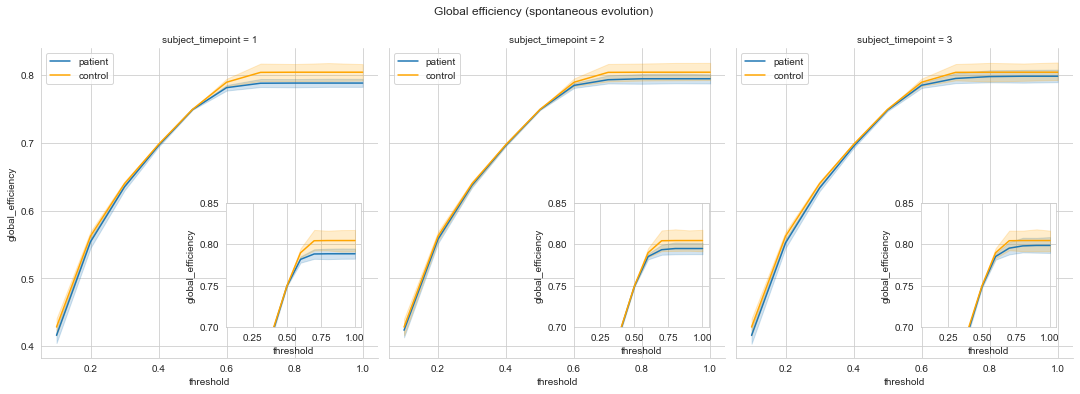

In [31]:
g = sns.relplot(data=glob_eff_df[glob_eff_df.subject_type=='patient'], x='threshold', y='global_efficiency', kind='line', 
            col='subject_timepoint', label='patient')

# overlay controls of tp 1
for idx in range(0, len(g.axes[0])):
    sns.lineplot(data=glob_eff_df[(glob_eff_df.subject_type=='control') & (glob_eff_df.subject_timepoint==1)], 
                x='threshold', y='global_efficiency', ax=g.axes[0, idx], color='orange', label='control')
    
    # add zoomed in plot
    axin = g.axes[0, idx].inset_axes([0.55, 0.1, 0.4, 0.4])
    sns.lineplot(data=glob_eff_df[(glob_eff_df.subject_type=='patient') & (glob_eff_df.subject_timepoint==idx+1)], 
                x='threshold', y='global_efficiency', ax=axin)
    sns.lineplot(data=glob_eff_df[(glob_eff_df.subject_type=='control') & (glob_eff_df.subject_timepoint==1)], 
                x='threshold', y='global_efficiency', ax=axin, color='orange')
    axin.set_ylim(0.7, 0.85)
    
g.fig.suptitle('Global efficiency (spontaneous evolution)', y=1.05)

## Plotting global efficiency after attack

In [24]:
attack_globEff_path = '/Users/jk1/temp/resilience_part2/atttacks/attacks_CM3D_z_norm_global_efficiencies.xlsx'

In [25]:
attack_globEff = pd.read_excel(attack_globEff_path)

In [26]:
attack_globEff.head()

,threshold,global_efficiency,subject,subject_type,subject_id,connectivity_file_name,subject_timepoint
0,0.1,0.463194,amc_002_FCS_1,control,2,attack_01_noNaN_transfer_exclude0_corrCMs_useA...,1
1,0.2,0.578916,amc_002_FCS_1,control,2,attack_01_noNaN_transfer_exclude0_corrCMs_useA...,1
2,0.3,0.646821,amc_002_FCS_1,control,2,attack_01_noNaN_transfer_exclude0_corrCMs_useA...,1
3,0.4,0.699732,amc_002_FCS_1,control,2,attack_01_noNaN_transfer_exclude0_corrCMs_useA...,1
4,0.5,0.750000,amc_002_FCS_1,control,2,attack_01_noNaN_transfer_exclude0_corrCMs_useA...,1


Text(0.5, 1.05, 'Global efficiency after attack')

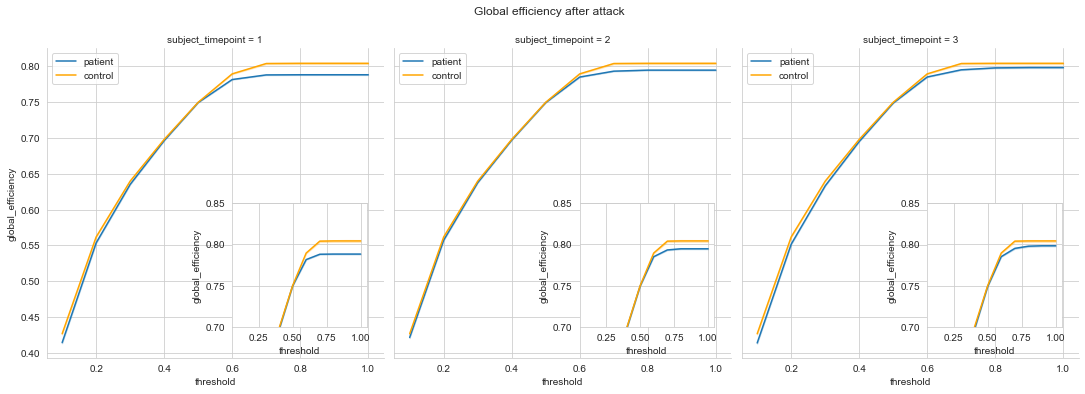

In [30]:
g = sns.relplot(data=attack_globEff[attack_globEff.subject_type=='patient'], x='threshold', y='global_efficiency', kind='line', 
            col='subject_timepoint', label='patient')

# overlay controls of tp 1
for idx in range(0, len(g.axes[0])):
    sns.lineplot(data=attack_globEff[(attack_globEff.subject_type=='control') & (attack_globEff.subject_timepoint==1)], 
                x='threshold', y='global_efficiency', ax=g.axes[0, idx], color='orange', label='control')
    
    # add zoomed in plot
    axin = g.axes[0, idx].inset_axes([0.55, 0.1, 0.4, 0.4])
    sns.lineplot(data=attack_globEff[(attack_globEff.subject_type=='patient') & (attack_globEff.subject_timepoint==idx+1)], 
                x='threshold', y='global_efficiency', ax=axin)
    sns.lineplot(data=attack_globEff[(attack_globEff.subject_type=='control') & (attack_globEff.subject_timepoint==1)], 
                x='threshold', y='global_efficiency', ax=axin, color='orange')
    axin.set_ylim(0.7, 0.85)
    
g.fig.suptitle('Global efficiency after attack', y=1.05)



## Compare initial global efficiency vs global efficiency after attack

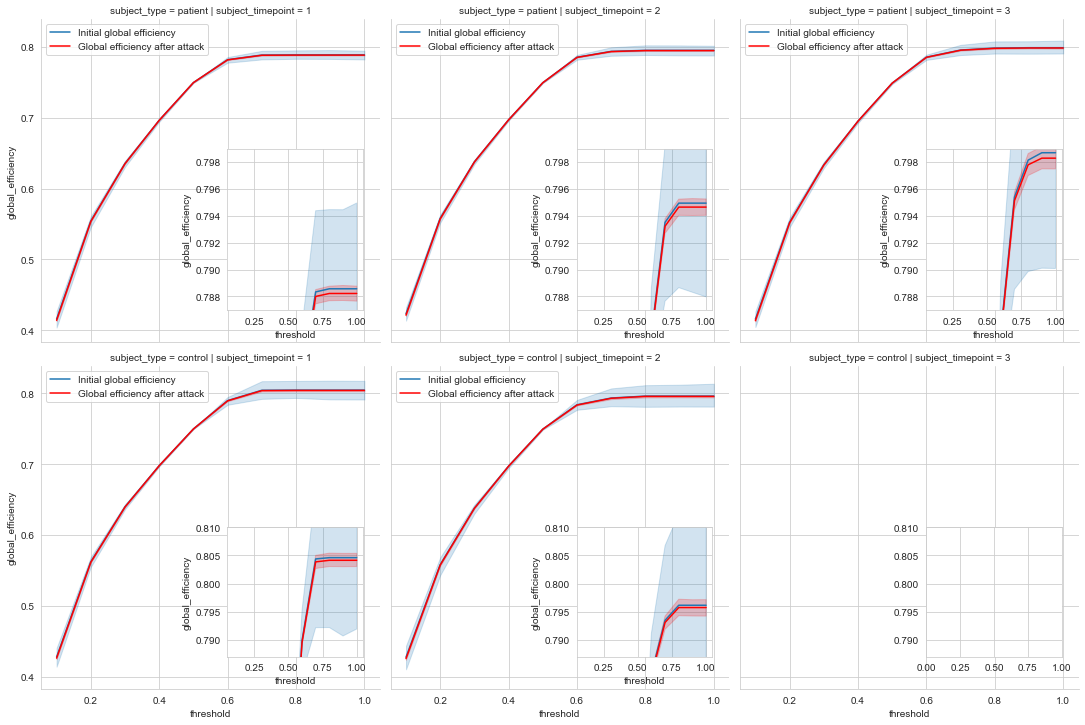

In [43]:
# plot spontaneous global efficiency
g = sns.relplot(data=glob_eff_df, x='threshold', y='global_efficiency', kind='line', 
            col='subject_timepoint', row='subject_type', label='Initial global efficiency')
# plot global efficiency after attack
for idx in range(0, len(g.axes[0])):
    # plot patients
    sns.lineplot(data=attack_globEff[(attack_globEff.subject_type=='patient') & (attack_globEff.subject_timepoint==idx+1)], 
                x='threshold', y='global_efficiency', ax=g.axes[0, idx], color='red', label='Global efficiency after attack')
    
    # add zoomed in plot
    axin = g.axes[0, idx].inset_axes([0.55, 0.1, 0.4, 0.5])
    sns.lineplot(data=glob_eff_df[(glob_eff_df.subject_type=='patient') & (glob_eff_df.subject_timepoint==idx+1)], 
                x='threshold', y='global_efficiency', ax=axin)
    sns.lineplot(data=attack_globEff[(attack_globEff.subject_type=='patient') & (attack_globEff.subject_timepoint==idx+1)], 
                x='threshold', y='global_efficiency', ax=axin, color='red')
    axin.set_ylim(0.787, 0.799)
    
# plot controls
for idx in range(0, len(g.axes[1])):
    sns.lineplot(data=attack_globEff[(attack_globEff.subject_type=='control') & (attack_globEff.subject_timepoint==idx+1)], 
                x='threshold', y='global_efficiency', ax=g.axes[1, idx], color='red', label='Global efficiency after attack')
    
    # add zoomed in plot
    axin = g.axes[1, idx].inset_axes([0.55, 0.1, 0.4, 0.4])
    sns.lineplot(data=glob_eff_df[(glob_eff_df.subject_type=='control') & (glob_eff_df.subject_timepoint==idx+1)], 
                x='threshold', y='global_efficiency', ax=axin)
    sns.lineplot(data=attack_globEff[(attack_globEff.subject_type=='control') & (attack_globEff.subject_timepoint==idx+1)], 
                x='threshold', y='global_efficiency', ax=axin, color='red')
    axin.set_ylim(0.787, 0.81)

